In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple
import time
import copy
import itertools
import random
from memory_profiler import memory_usage

## Problem 1

In [33]:
@dataclass
class Ad:
    id: str
    deadline: int
    profit: int

In [34]:
def greedy_job_sequencing(ads: List[Ad]) -> Tuple[List[Tuple[int, Ad]], int]:
    ads_sorted = sorted(ads, key=lambda a: a.profit, reverse=True)

    max_deadline = max(a.deadline for a in ads_sorted)
    slots = [None] * max_deadline

    total_revenue = 0
    schedule = []

    for ad in ads_sorted:
        for slot_idx in range(min(ad.deadline, max_deadline) - 1, -1, -1):
            if slots[slot_idx] is None:
                slots[slot_idx] = ad
                total_revenue += ad.profit
                schedule.append((slot_idx + 1, ad))
                break

    schedule.sort(key=lambda x: x[0])
    return schedule, total_revenue

In [35]:
sample_ads = [
    Ad("A1", 2, 60),
    Ad("A2", 1, 100),
    Ad("A3", 3, 20),
    Ad("A4", 2, 40),
    Ad("A5", 1, 20),
    Ad("A6", 3, 70),
    Ad("A7", 2, 50)
]

schedule, revenue = greedy_job_sequencing(sample_ads)

schedule_data = []
for slot, ad in schedule:
    schedule_data.append({"Slot": slot, "Ad ID": ad.id, "Deadline": ad.deadline, "Profit": ad.profit})

schedule_df = pd.DataFrame(schedule_data)
display(schedule_df)

print(f"✅ Total Revenue: {revenue}")

,Slot,Ad ID,Deadline,Profit
0,1,A2,1,100
1,2,A1,2,60
2,3,A6,3,70


✅ Total Revenue: 230


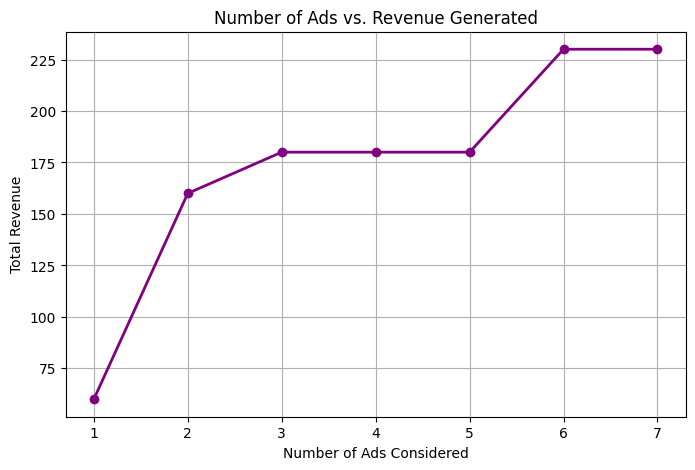

In [36]:
revenues = []
num_ads = []

for i in range(1, len(sample_ads) + 1):
    subset = sample_ads[:i]
    _, rev = greedy_job_sequencing(subset)
    num_ads.append(i)
    revenues.append(rev)

plt.figure(figsize=(8, 5))
plt.plot(num_ads, revenues, marker='o', color='purple', linewidth=2)
plt.title("Number of Ads vs. Revenue Generated")
plt.xlabel("Number of Ads Considered")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

## Problem 2

In [37]:
@dataclass
class Project:
    id: str
    cost: int
    profit: int


In [38]:
def knapsack_01(projects: List[Project], budget: int) -> Tuple[int, List[Project]]:
    n = len(projects)
    dp = np.zeros((n + 1, budget + 1), dtype=int)

    for i in range(1, n + 1):
        cost = projects[i - 1].cost
        profit = projects[i - 1].profit
        for b in range(budget + 1):
            if cost <= b:
                dp[i][b] = max(dp[i - 1][b], dp[i - 1][b - cost] + profit)
            else:
                dp[i][b] = dp[i - 1][b]

    selected = []
    b = budget
    for i in range(n, 0, -1):
        if dp[i][b] != dp[i - 1][b]:
            selected.append(projects[i - 1])
            b -= projects[i - 1].cost

    selected.reverse()
    return dp[n][budget], selected


In [39]:
projects = [
    Project("P1", 10, 15),
    Project("P2", 20, 25),
    Project("P3", 30, 40),
    Project("P4", 25, 30),
    Project("P5", 15, 18),
    Project("P6", 12, 20)
]

budget = 50


In [40]:
max_profit, chosen = knapsack_01(projects, budget)

# Display all projects
df_projects = pd.DataFrame([{"Project": p.id, "Cost": p.cost, "Profit": p.profit} for p in projects])
display(df_projects)

print(f"Total Budget: ₹{budget} lakhs")
print(f"Maximum Profit: ₹{max_profit} lakhs\n")
print("Selected Projects for Maximum Profit:")
for p in chosen:
    print(f" - {p.id}: Cost ₹{p.cost}L, Profit ₹{p.profit}L")


,Project,Cost,Profit
0,P1,10,15
1,P2,20,25
2,P3,30,40
3,P4,25,30
4,P5,15,18
5,P6,12,20


Total Budget: ₹50 lakhs
Maximum Profit: ₹65 lakhs

Selected Projects for Maximum Profit:
 - P2: Cost ₹20L, Profit ₹25L
 - P3: Cost ₹30L, Profit ₹40L


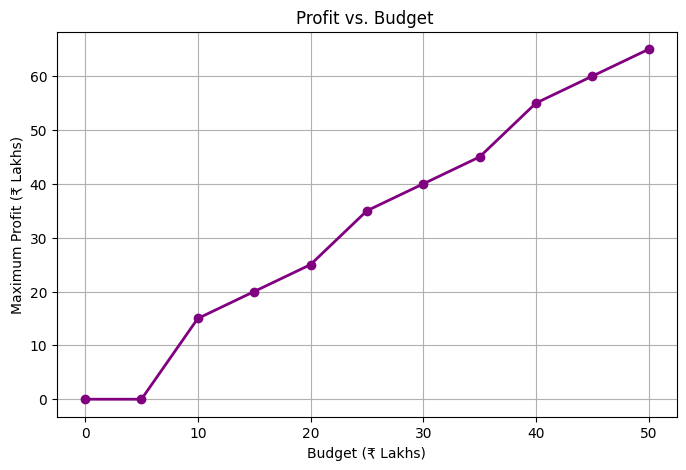

In [41]:
# --- Profit vs. Budget (0 to 50 lakhs) ---

budgets = list(range(0, 51, 5))   # Budgets from 0 to 50 (step 5)
profits = []

for b in budgets:
    profit, _ = knapsack_01(projects, b)
    profits.append(profit)

plt.figure(figsize=(8,5))
plt.plot(budgets, profits, marker='o', color='purple', linewidth=2)
plt.title("Profit vs. Budget ")
plt.xlabel("Budget (₹ Lakhs)")
plt.ylabel("Maximum Profit (₹ Lakhs)")
plt.grid(True)
plt.show()

## Problem 3

In [42]:
# Sample Sudoku puzzle (0 means empty cell)
sudoku = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

In [43]:
def print_sudoku(board):
    """Pretty print Sudoku board"""
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(board[i][j] if board[i][j] != 0 else ".", end=" ")
        print()

In [44]:
def is_valid(board, row, col, num):
    """Check if placing num in board[row][col] is valid"""
    # Row check
    if num in board[row]:
        return False
    
    # Column check
    for i in range(9):
        if board[i][col] == num:
            return False

    # 3x3 box check
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True


def find_empty(board):
    """Find first empty cell (returns row, col or None)"""
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None


def solve_sudoku(board):
    """Solve Sudoku using backtracking"""
    empty = find_empty(board)
    if not empty:
        return True  # puzzle solved
    row, col = empty

    for num in range(1, 10):
        if is_valid(board, row, col, num):
            board[row][col] = num

            if solve_sudoku(board):
                return True

            # Undo the move (backtrack)
            board[row][col] = 0

    return False

In [45]:
print("Input Sudoku Puzzle:\n")
print_sudoku(sudoku)

start_time = time.time()
solve_sudoku(sudoku)
end_time = time.time()

print("\nSolved Sudoku:\n")
print_sudoku(sudoku)
print(f"\nTime taken: {end_time - start_time:.4f} seconds")

Input Sudoku Puzzle:

5 3 . | . 7 . | . . . 
6 . . | 1 9 5 | . . . 
. 9 8 | . . . | . 6 . 
---------------------
8 . . | . 6 . | . . 3 
4 . . | 8 . 3 | . . 1 
7 . . | . 2 . | . . 6 
---------------------
. 6 . | . . . | 2 8 . 
. . . | 4 1 9 | . . 5 
. . . | . 8 . | . 7 9 

Solved Sudoku:

5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
---------------------
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
---------------------
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 

Time taken: 0.0311 seconds


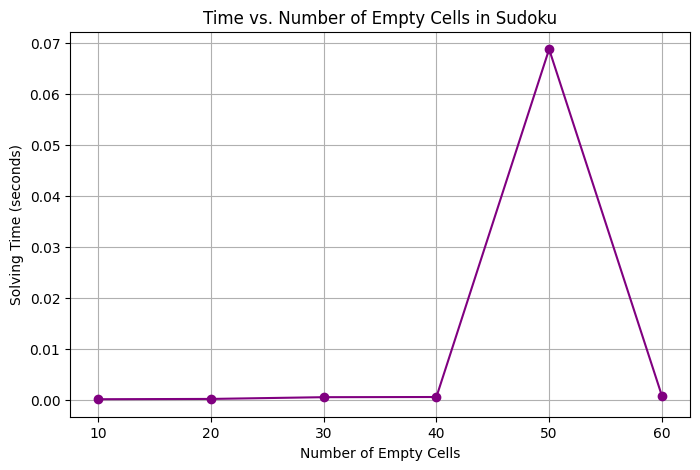

In [46]:
empty_counts = [10, 20, 30, 40, 50, 60]
times = []

for empties in empty_counts:
    board = copy.deepcopy(sudoku)

    # Randomly clear 'empties' number of cells
    cleared = 0
    import random
    while cleared < empties:
        r, c = random.randint(0, 8), random.randint(0, 8)
        if board[r][c] != 0:
            board[r][c] = 0
            cleared += 1

    start = time.time()
    solve_sudoku(board)
    times.append(time.time() - start)

plt.figure(figsize=(8,5))
plt.plot(empty_counts, times, marker='o', color='purple')
plt.title("Time vs. Number of Empty Cells in Sudoku")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Solving Time (seconds)")
plt.grid(True)
plt.show()

## Problem 4

In [47]:
def brute_force_crack(target: str, charset: str, max_len: int):
    """
    Try all combinations from length 1..max_len (inclusive) using charset.
    Returns tuple: (found_password_or_None, attempts, elapsed_seconds)
    """
    attempts = 0
    start = time.perf_counter()
    for length in range(1, max_len + 1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            guess = ''.join(combo)
            if guess == target:
                elapsed = time.perf_counter() - start
                return guess, attempts, elapsed
    elapsed = time.perf_counter() - start
    return None, attempts, elapsed

In [48]:
def run_experiment(charset: str, max_len: int, trials_per_length: int = 1, worst_case: bool = False):
    """
    Run experiments for lengths 1..max_len.
    If trials_per_length > 1, picks random targets of that length and collects results.
    If worst_case=True, targets are the lexicographically last string for that length.
    Returns a pandas DataFrame with columns: password_length, target_password, found, attempts, time_seconds
    """
    rows = []
    random.seed(42)
    for length in range(1, max_len + 1):
        for t in range(trials_per_length):
            if worst_case:
                target = charset[-1] * length
            else:
                target = ''.join(random.choice(charset) for _ in range(length))
            found, attempts, elapsed = brute_force_crack(target, charset, max_len=length)
            rows.append({
                'password_length': length,
                'target_password': target,
                'found': bool(found),
                'attempts': attempts,
                'time_seconds': elapsed
            })
    return pd.DataFrame(rows)

In [49]:
# Example experiment
charset = 'abcd123'
max_len = 7          
df = run_experiment(charset, max_len, trials_per_length=1, worst_case=False)

df

,password_length,target_password,found,attempts,time_seconds
0,1,2,True,6,0.000014
1,2,aa,True,8,0.000009
2,3,2cb,True,317,0.000089
3,4,bb2a,True,827,0.000216
4,5,221a1,True,16721,0.003024
5,6,daaabb,True,70037,0.009585
6,7,11a1b22,True,676542,0.092300


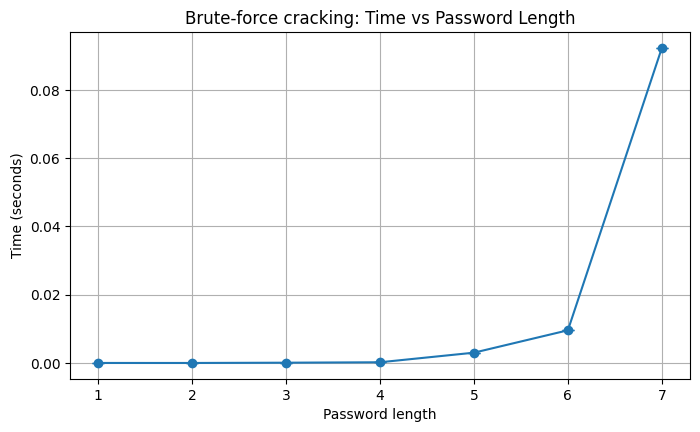

In [50]:
summary = df.groupby('password_length')['time_seconds'].agg(['mean','std','count']).reset_index()

plt.figure(figsize=(8,4.5))
plt.errorbar(summary['password_length'], summary['mean'],
             yerr=summary['std'].fillna(0),
             marker='o', linestyle='-', capsize=4)
plt.title('Brute-force cracking: Time vs Password Length')
plt.xlabel('Password length')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()